### Reliable project


#### Notes
* Install in a separare virtual enviroment (namely shapely, geocondas and fiona from pip, not conda), otherwise will may get error due to different versions ('Shell is not a LinearRing'error) when reading shapefiles with geopandas

#### Data
*Datasets are also here: https://github.com/INmais/reliable/tree/master/data_notebooks

#### Libraries

In [37]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import descartes

In [38]:
#this will not be used for now
df = pd.read_csv("/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#had to change encoding
df.head()

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,N_IND_RESID_DESEMP_PROC_1EMPRG,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID
0,2011,PT,PT,1,Total Nacional,3544389,3219791,1946604,542393,730794,...,122310,539870,4361187,2339094,3966482,133386,1154709,3073092,1773245,2860521
1,2011,1,Continente,2,NUT1,3353610,3035969,1820486,516785,698698,...,114999,515712,4150252,2257145,3782538,121055,1115357,2913840,1669455,2697144
2,2011,11,Norte,3,NUT2,1209911,1118014,744666,200722,172626,...,46644,207538,1501883,768566,1376384,43023,533848,925012,631487,1008020
3,2011,118,Alto Trs-os-Montes,4,NUT3,127220,123194,66466,26515,30213,...,2546,6669,68441,63100,103862,7725,13567,47149,29828,58694
4,2011,1706,Montalegre,5,Municipio,10157,10036,5656,2176,2204,...,141,246,3098,3866,6049,692,604,1802,1235,2741


#### IV Index

In [39]:
df1 = pd.read_csv("/Users/dvf/Desktop/IndiceVulnerabilidadeMontalegre.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#had to change encoding
df1["IV"] = pd.to_numeric(df1["IV"])
df1.head()

,Freguesia,IV
0,170601,10
1,170602,10
2,170603,11
3,170604,11
4,170605,10


#### Source "IV Index":
Susana Silva, Rita Roquette1, Baltazar Nunes, Mapeamento de índice de vulnerabilidade a ondas de calor, International Conference on Urban Risks (ICUR 2016) 

http://repositorio.insa.pt/bitstream/10400.18/3870/1/ICUR2016_Poster_final.pdf 

##### Other References:
Mapping community determinants of heat vulnerability." (https://www.ncbi.nlm.nih.gov/pubmed/20049125)

Development of a heat vulnerability index for New York State. (https://www.ncbi.nlm.nih.gov/pubmed/29195682)

#### Shapefile

Source: INE Censos 2011 http://mapas.ine.pt/download/index2011.phtml

In [40]:
###Geopandas Shell is not a LinearRing bug (needs clean enviroment, otherwise problem with shapefiles version)
fp = "/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.shp"
map_df = gpd.read_file(fp) #this is for geopandas

In [41]:
print (map_df.columns)

Index(['DTMN11', 'FR11', 'SEC11', 'SS11', 'BGRI11', 'LUG11', 'LUG11DESIG',
       'geometry'],
      dtype='object')


In [42]:
map_df.crs

{'init': 'epsg:3763'}

In [43]:
map_df['Freguesias'] = map_df["DTMN11"] + map_df["FR11"]

In [44]:
Dictionary = {
    '170601': 10,
    '170602': 10,
    '170603': 11,
    '170604': 11,
    '170605': 10,
    '170606': 10,
    '170607': 11,
    '170608': 9,
    '170609': 11,
    '170610': 9,
    '170611': 14,
    '170612': 10,
    '170613': 11,
    '170614': 12,
    '170615': 9,
    '170616': 10,
    '170617': 9,
    '170618': 10,
    '170619': 10,
    '170620': 11,
    '170621': 9,
    '170622': 11,
    '170623': 10,
    '170624': 11,
    '170625': 14,
    '170626': 10,
    '170627': 10,
    '170628': 12,
    '170629': 9,
    '170630': 11,
    '170631': 11,
    '170632':10,
    '170633': 12,
    '170634': 9,
    '170635': 11
}
print (Dictionary)

{'170601': 10, '170602': 10, '170603': 11, '170604': 11, '170605': 10, '170606': 10, '170607': 11, '170608': 9, '170609': 11, '170610': 9, '170611': 14, '170612': 10, '170613': 11, '170614': 12, '170615': 9, '170616': 10, '170617': 9, '170618': 10, '170619': 10, '170620': 11, '170621': 9, '170622': 11, '170623': 10, '170624': 11, '170625': 14, '170626': 10, '170627': 10, '170628': 12, '170629': 9, '170630': 11, '170631': 11, '170632': 10, '170633': 12, '170634': 9, '170635': 11}


In [45]:
# converting to dict 
dictv = df1.set_index('Freguesia').to_dict('IV')

In [46]:
Dictionary

{'170601': 10,
 '170602': 10,
 '170603': 11,
 '170604': 11,
 '170605': 10,
 '170606': 10,
 '170607': 11,
 '170608': 9,
 '170609': 11,
 '170610': 9,
 '170611': 14,
 '170612': 10,
 '170613': 11,
 '170614': 12,
 '170615': 9,
 '170616': 10,
 '170617': 9,
 '170618': 10,
 '170619': 10,
 '170620': 11,
 '170621': 9,
 '170622': 11,
 '170623': 10,
 '170624': 11,
 '170625': 14,
 '170626': 10,
 '170627': 10,
 '170628': 12,
 '170629': 9,
 '170630': 11,
 '170631': 11,
 '170632': 10,
 '170633': 12,
 '170634': 9,
 '170635': 11}

In [47]:
map_df["IV"] = map_df['Freguesias'].map(Dictionary)

In [48]:
map_df["IV"]

0        9
1       14
2       10
3       10
4        9
5        9
6       10
7       11
8       10
9       10
10      10
11      10
12      11
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      11
        ..
1387    11
1388    11
1389    11
1390    11
1391    11
1392    10
1393    11
1394    10
1395    11
1396    11
1397    11
1398    11
1399    10
1400     9
1401     9
1402     9
1403    11
1404     9
1405     9
1406     9
1407    11
1408     9
1409     9
1410     9
1411    11
1412     9
1413    12
1414    12
1415    12
1416     9
Name: IV, Length: 1417, dtype: int64

In [49]:
map_df['Freguesias'] #check

0       170634
1       170625
2       170626
3       170612
4       170608
5       170608
6       170626
7       170609
8       170626
9       170626
10      170626
11      170612
12      170620
13      170626
14      170626
15      170626
16      170626
17      170626
18      170626
19      170626
20      170626
21      170626
22      170626
23      170626
24      170626
25      170626
26      170626
27      170626
28      170626
29      170607
         ...  
1387    170630
1388    170630
1389    170630
1390    170630
1391    170630
1392    170602
1393    170613
1394    170602
1395    170613
1396    170613
1397    170613
1398    170613
1399    170606
1400    170615
1401    170608
1402    170608
1403    170613
1404    170615
1405    170615
1406    170615
1407    170613
1408    170608
1409    170615
1410    170615
1411    170613
1412    170615
1413    170628
1414    170628
1415    170628
1416    170617
Name: Freguesias, Length: 1417, dtype: object

In [50]:
print (map_df['geometry'])

0       POLYGON ((26131.41889999993 232084.4857000001,...
1       POLYGON ((17805.88310000021 228000.6173999999,...
2       POLYGON ((16606.63999999966 223659.7104000002,...
3       POLYGON ((35531.56340000033 242104.0514000002,...
4       POLYGON ((26191.65440000035 240495.8397000004,...
5       POLYGON ((26133.63350000046 240653.2193, 26158...
6       POLYGON ((13150.00980000012 220814.8302999996,...
7       POLYGON ((11692.52350000013 225573.6453000009,...
8       POLYGON ((12941.24390000012 220932.5219999999,...
9       POLYGON ((12881.59680000041 220843.2776999995,...
10      POLYGON ((15859.73909999989 214431.5532000009,...
11      POLYGON ((35544.32969999965 242835.6655000001,...
12      POLYGON ((30875.09630000032 247768.6159000006,...
13      POLYGON ((18061.94409999996 214464.7544, 18075...
14      POLYGON ((18249.10919999983 214547.2429000009,...
15      POLYGON ((18472.24459999986 214625.7025000006,...
16      POLYGON ((18316.67379999999 214697.2583000008,...
17      POLYGO

#### Mapping Index

In [51]:
map_df.plot(color='white', edgecolor='lightgrey', figsize=(11,9))

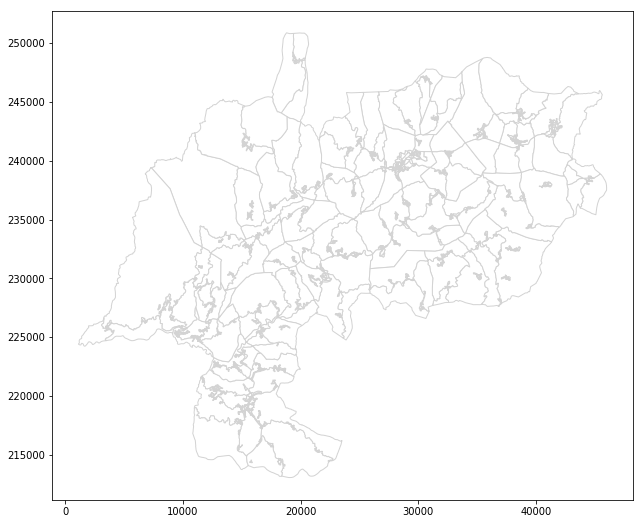

In [52]:
ax0 = map_df.plot(color='white', edgecolor='lightgrey', figsize=(11,9))

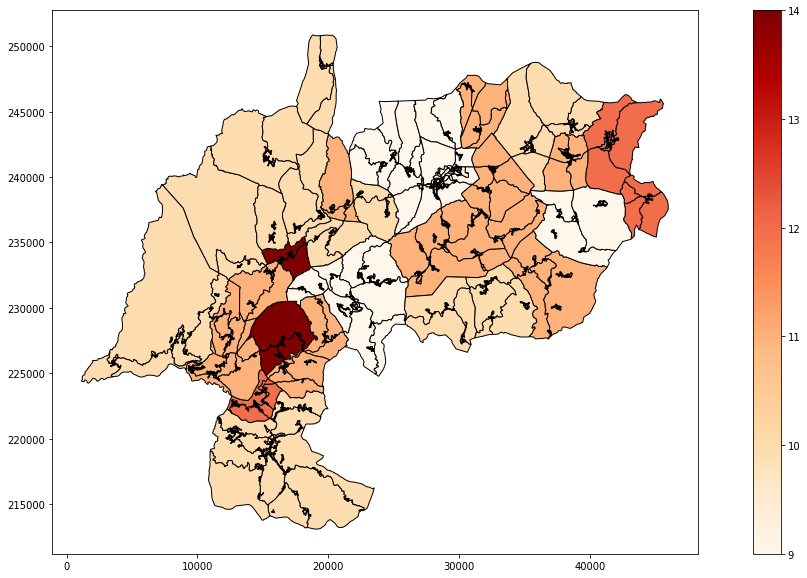

In [53]:
ax= map_df.plot(column='IV', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

#### Merging data

In [54]:
df = pd.read_csv("/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#df.set_index('GEO_COD').join(map_df.set_index('Freguesias'))
map_df.join(df.set_index('GEO_COD'), on='Freguesias')

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV,...,N_IND_RESID_DESEMP_PROC_1EMPRG,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,...",170634,9,...,2,4,169,234,417,27,40,102,93,155
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,...",170625,14,...,7,2,29,79,121,13,6,10,10,27
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,...",170626,10,...,19,35,398,527,840,73,96,229,172,314
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,...",170612,10,...,1,4,41,114,155,16,5,20,8,38
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,...",170608,9,...,0,0,16,22,36,4,3,9,10,16
5,1706,08,001,04,17060800104,013976,Donões,"POLYGON ((26133.63350000046 240653.2193, 26158...",170608,9,...,0,0,16,22,36,4,3,9,10,16
6,1706,26,001,29,17062600129,014050,Borralha,"POLYGON ((13150.00980000012 220814.8302999996,...",170626,10,...,19,35,398,527,840,73,96,229,172,314
7,1706,09,001,13,17060900113,013983,Viveiro,"POLYGON ((11692.52350000013 225573.6453000009,...",170609,11,...,8,11,88,167,253,11,21,56,55,72
8,1706,26,001,28,17062600128,014050,Borralha,"POLYGON ((12941.24390000012 220932.5219999999,...",170626,10,...,19,35,398,527,840,73,96,229,172,314
9,1706,26,001,31,17062600131,014050,Borralha,"POLYGON ((12881.59680000041 220843.2776999995,...",170626,10,...,19,35,398,527,840,73,96,229,172,314


In [55]:
df.index

RangeIndex(start=0, stop=1500, step=1)

In [56]:
df['N_EDIFICIOS_CLASSICOS']

0       3544389
1       3353610
2       1209911
3        127220
4         10157
5           433
6           154
7           280
8           751
9           139
10          169
11          165
12           90
13          349
14          136
15          120
16          353
17          345
18           97
19          993
20          201
21          185
22          172
23          132
24          203
25          108
26          150
27          206
28          195
29          230
         ...   
1470          1
1471          2
1472          0
1473          7
1474          2
1475          2
1476          2
1477          9
1478          3
1479          6
1480          1
1481          9
1482          7
1483          6
1484          2
1485          2
1486          2
1487          8
1488          3
1489          5
1490         12
1491         19
1492          5
1493          3
1494         16
1495          6
1496         11
1497          0
1498          0
1499          1
Name: N_EDIFICIOS_CLASSI

In [57]:
df['N_ALOJAMENTOS']

0       5878756
1       5639257
2       1850890
3        150758
4         10555
5           440
6           154
7           280
8           752
9           139
10          171
11          165
12           90
13          357
14          137
15          120
16          353
17          346
18           97
19         1231
20          201
21          185
22          174
23          135
24          203
25          108
26          150
27          212
28          196
29          232
         ...   
1470          1
1471          2
1472          0
1473          7
1474          2
1475          2
1476          2
1477          9
1478          3
1479          7
1480          1
1481          9
1482          7
1483          6
1484          2
1485          2
1486          2
1487          8
1488          3
1489          5
1490         12
1491         19
1492          5
1493          3
1494         16
1495          6
1496         11
1497          0
1498          0
1499          1
Name: N_ALOJAMENTOS, Len

#### EDIFICIOS
N_EDIFICIOS_CLASSICOS (https://www.ine.pt/bddXplorer/htdocs/minfo.jsp?var_cd=0005970)

N_EDIFICIOS_CLASSICOS_1OU2

N_EDIFICIOS_CLASSICOS_ISOLADOS

N_EDIFICIOS_CLASSICOS_GEMIN

N_EDIFICIOS_CLASSICOS_EMBANDA

N_EDIFICIOS_CLASSICOS_3OUMAIS

N_EDIFICIOS_CLASSICOS_OUTROS

N_EDIFICIOS_EXCLUSIV_RESID

N_EDIFICIOS_PRINCIPAL_RESID

N_EDIFICIOS_PRINCIP_NAO_RESID

N_EDIFICIOS_1OU2_PISOS

N_EDIFICIOS_3OU4_PISOS

N_EDIFICIOS_5OU_MAIS_PISOS

#### Edificios ano de construção

N_EDIFICIOS_CONSTR_ANTES_1919

N_EDIFICIOS_CONSTR_1919A1945

N_EDIFICIOS_CONSTR_1946A1960

N_EDIFICIOS_CONSTR_1961A1970

N_EDIFICIOS_CONSTR_1971A1980

N_EDIFICIOS_CONSTR_1981A1990

N_EDIFICIOS_CONSTR_1991A1995

N_EDIFICIOS_CONSTR_1996A2000

N_EDIFICIOS_CONSTR_2001A2005

N_EDIFICIOS_CONSTR_2006A2011

#### new variable (sum all)

#### Materiais

N_EDIFICIOS_ESTRUT_BETAO

N_EDIFICIOS_ESTRUT_COM_PLACA

N_EDIFICIOS_ESTRUT_SEM_PLACA

N_EDIFICIOS_ESTRUT_ADOBE_PEDRA

N_EDIFICIOS_ESTRUT_OUTRA

#### Alojamentos

N_ALOJAMENTOS

N_ALOJAMENTOS_FAMILIARES

N_ALOJAMENTOS_FAM_CLASSICOS

N_ALOJAMENTOS_FAM_N_CLASSICOS

N_ALOJAMENTOS_COLECTIVOS

N_CLASSICOS_RES_HABITUAL

N_ALOJAMENTOS_RES_HABITUAL

N_ALOJAMENTOS_VAGOS

#### Habitabilidade

N_RES_HABITUAL_COM_AGUA

N_RES_HABITUAL_COM_RETRETE

N_RES_HABITUAL_COM_ESGOTOS

N_RES_HABITUAL_COM_BANHO

#### Area

N_RES_HABITUAL_AREA_50

N_RES_HABITUAL_AREA_50_100

N_RES_HABITUAL_AREA_100_200

N_RES_HABITUAL_AREA_200

N_RES_HABITUAL_1_2_DIV

N_RES_HABITUAL_3_4_DIV

N_RES_HABITUAL_ESTAC_1

N_RES_HABITUAL_ESTAC_2

N_RES_HABITUAL_ESTAC_3

N_RES_HABITUAL_PROP_OCUP

N_RES_HABITUAL_ARREND

#### Familias

N_FAMILIAS_CLASSICAS

N_FAMILIAS_INSTITUCIONAIS

N_FAMILIAS_CLASSICAS_1OU2_PESS

N_FAMILIAS_CLASSICAS_3OU4_PESS

N_FAMILIAS_CLASSICAS_NPES65

N_FAMILIAS_CLASSICAS_NPES14

N_FAMILIAS_CLASSIC_SEM_DESEMP

N_FAMILIAS_CLASSIC_1DESEMPREG

N_FAMILIAS_CLASS_2MAIS_DESEMP

#### Nucleos familiares

N_NUCLEOS_FAMILIARES

N_NUCLEOS_1FILH_NAO_CASADO

N_NUCLEOS_2FILH_NAO_CASADO

N_NUCLEOS_FILH_INF_6ANOS

N_NUCLEOS_FILH_INF_15ANOS

N_NUCLEOS_FILH_MAIS_15ANOS

#### Individuos - Genero

N_INDIVIDUOS_PRESENT

N_INDIVIDUOS_PRESENT_H

N_INDIVIDUOS_PRESENT_M


N_INDIVIDUOS_RESIDENT

N_INDIVIDUOS_RESIDENT_H

N_INDIVIDUOS_RESIDENT_M

#### Individuos - Faixa Etária

N_INDIVIDUOS_RESIDENT_0A4

N_INDIVIDUOS_RESIDENT_5A9

N_INDIVIDUOS_RESIDENT_10A13

N_INDIVIDUOS_RESIDENT_14A19

N_INDIVIDUOS_RESIDENT_15A19

N_INDIVIDUOS_RESIDENT_20A24

N_INDIVIDUOS_RESIDENT_20A64

N_INDIVIDUOS_RESIDENT_25A64

N_INDIVIDUOS_RESIDENT_65

##### New variable sum all extract oldery

N_INDIVIDUOS_RESIDENT_H_0A4

N_INDIVIDUOS_RESIDENT_H_5A9

N_INDIVIDUOS_RESIDENT_H_10A13

N_INDIVIDUOS_RESIDENT_H_14A19

N_INDIVIDUOS_RESIDENT_H_15A19

N_INDIVIDUOS_RESIDENT_H_20A24

N_INDIVIDUOS_RESIDENT_H_20A64

N_INDIVIDUOS_RESIDENT_H_25A64

N_INDIVIDUOS_RESIDENT_H_65

N_INDIVIDUOS_RESIDENT_M_0A4

N_INDIVIDUOS_RESIDENT_M_5A9

N_INDIVIDUOS_RESIDENT_M_10A13

N_INDIVIDUOS_RESIDENT_M_14A19

N_INDIVIDUOS_RESIDENT_M_15A19

N_INDIVIDUOS_RESIDENT_M_20A24

N_INDIVIDUOS_RESIDENT_M_20A64

N_INDIVIDUOS_RESIDENT_M_25A64

N_INDIVIDUOS_RESIDENT_M_65

#### Habilitações

N_INDIV_RESIDENT_N_LER_ESCRV

N_IND_RESIDENT_FENSINO_1BAS

N_IND_RESIDENT_FENSINO_2BAS

N_IND_RESIDENT_FENSINO_3BAS

N_IND_RESIDENT_FENSINO_SEC

N_IND_RESIDENT_FENSINO_POSSEC

N_IND_RESIDENT_FENSINO_SUP

N_IND_RESIDENT_ENSINCOMP_1BAS

N_IND_RESIDENT_ENSINCOMP_2BAS

N_IND_RESIDENT_ENSINCOMP_3BAS

N_IND_RESIDENT_ENSINCOMP_SEC

N_IND_RESIDENT_ENSINCOMP_POSEC

N_IND_RESIDENT_ENSINCOMP_SUP

#### Situação profissional

N_IND_RESID_DESEMP_PROC_1EMPRG

N_IND_RESID_DESEMP_PROC_EMPRG

N_IND_RESID_EMPREGADOS

N_IND_RESID_PENS_REFORM

N_IND_RESID_SEM_ACT_ECON

N_IND_RESID_EMPREG_SECT_PRIM

N_IND_RESID_EMPREG_SECT_SEQ

N_IND_RESID_EMPREG_SECT_TERC

N_IND_RESID_ESTUD_MUN_RESID

N_IND_RESID_TRAB_MUN_RESID



In [58]:
result = pd.concat([map_df, df], axis=1)

## Adding locations

convert lat long to umt
https://www.latlong.net/lat-long-utm.html
to ETRS89 Portugal TM06 https://twcc.fr/en/#


In [59]:
# initialize list of lists 
lares = [['Centro Social e Paroquial de Cabril', 41.714849, -8.034901, 30, 580283.49, 4618566.98, 8172.777, 227274.399], 
         ['Centro Social e Paroquial de Vilar de Perdizes', 41.855523, -7.633986, 10, 613386.77, 4634637.30, 41446.133,243014.733], 
         ['Lar Monte Sereno', 41.798622, -7.666606, 37, 610777.14, 4628277.08, 38771.743,236679.488],
         ['Lar Nossa Senhora do Pranto',41.641292, -7.945080,30, 587855.50,4610487.98, 15665.477,219117.06],
         ['Lar dos Pisões para Seniores', 41.737331, -7.869785, 22, 593986.37,4621230.21, 21906.038,229800.279],
         ['Santa Casa da Misericórdia - Lar', 41.822516, -7.790499, 80,600446.70,4630777.71, 28464.204,239284.931],
         ['Residencial Santa Clara', 41.785061, -7.781880, 36,601221.45, 4626629.28, 29180.277, 239287.822]]
    
# Create the pandas DataFrame 
df = pd.DataFrame(lares, columns = ['Name', 'lat', 'long', 'pop', 'UTM_Easting', 'UTM_Northing', 'x_ETRS89','y_ETRS89']) 


In [60]:
from shapely.geometry import Point
# combine lat and lon column to a shapely Point() object
df['geometry'] = df.apply(lambda x: Point((float(x.x_ETRS89), float(x.y_ETRS89))), axis=1)

In [61]:
df.head()

,Name,lat,long,pop,UTM_Easting,UTM_Northing,x_ETRS89,y_ETRS89,geometry
0,Centro Social e Paroquial de Cabril,41.714849,-8.034901,30,580283.49,4618566.98,8172.777,227274.399,POINT (8172.777 227274.399)
1,Centro Social e Paroquial de Vilar de Perdizes,41.855523,-7.633986,10,613386.77,4634637.30,41446.133,243014.733,POINT (41446.133 243014.733)
2,Lar Monte Sereno,41.798622,-7.666606,37,610777.14,4628277.08,38771.743,236679.488,POINT (38771.743 236679.488)
3,Lar Nossa Senhora do Pranto,41.641292,-7.945080,30,587855.50,4610487.98,15665.477,219117.060,POINT (15665.477 219117.06)
4,Lar dos Pisões para Seniores,41.737331,-7.869785,22,593986.37,4621230.21,21906.038,229800.279,POINT (21906.038 229800.279)


In [62]:
crs = {'init': 'epsg:3763'}

In [63]:
df = gpd.GeoDataFrame(df, geometry='geometry')

In [64]:
df.crs = {'init':'epsg:3763'}

In [65]:
df = df.to_crs({'init': 'epsg:4326'}) 

In [66]:
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(df.x_ETRS89, df.y_ETRS89)]
df = GeoDataFrame(df, geometry=geometry)
df.to_file(driver = 'ESRI Shapefile', filename= "df.shp")

In [67]:
df.head()

,Name,lat,long,pop,UTM_Easting,UTM_Northing,x_ETRS89,y_ETRS89,geometry
0,Centro Social e Paroquial de Cabril,41.714849,-8.034901,30,580283.49,4618566.98,8172.777,227274.399,POINT (8172.777 227274.399)
1,Centro Social e Paroquial de Vilar de Perdizes,41.855523,-7.633986,10,613386.77,4634637.30,41446.133,243014.733,POINT (41446.133 243014.733)
2,Lar Monte Sereno,41.798622,-7.666606,37,610777.14,4628277.08,38771.743,236679.488,POINT (38771.743 236679.488)
3,Lar Nossa Senhora do Pranto,41.641292,-7.945080,30,587855.50,4610487.98,15665.477,219117.060,POINT (15665.477 219117.06)
4,Lar dos Pisões para Seniores,41.737331,-7.869785,22,593986.37,4621230.21,21906.038,229800.279,POINT (21906.038 229800.279)


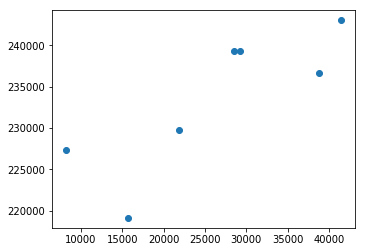

In [68]:
df.plot()

In [69]:
df.crs = {'init':'epsg:3763'}

In [70]:
# Filepaths
# Check the data
map_df.head()

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,...",170634,9
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,...",170625,14
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,...",170626,10
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,...",170612,10
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,...",170608,9


In [71]:
cols = list(map_df.columns.values)

In [72]:
map_df.crs

{'init': 'epsg:3763'}

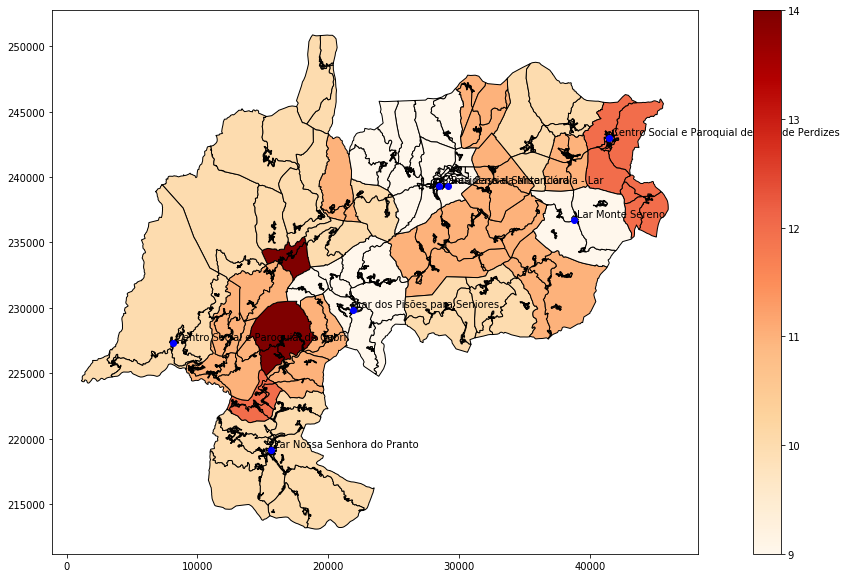

In [73]:
import matplotlib.pyplot as plt
#map_df.plot(column='IV', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')
ax = map_df.plot(column='IV', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')
df.plot(ax=ax, color='blue')
for x, y, label in zip(df.geometry.x, df.geometry.y, df.Name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.show()

#### Check if point is inside a polygon per IV

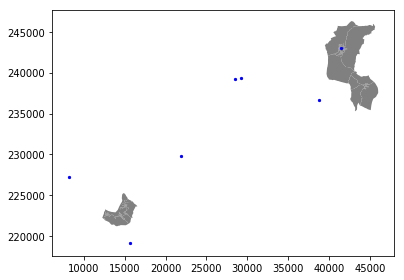

In [74]:
map_dfIV12 = map_df.loc[map_df['IV']==12]

map_dfIV12.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

map_dfIV12.plot(ax=ax, facecolor='gray')

df.plot(ax=ax, color='blue', markersize=5);

plt.tight_layout();

Centro Vilar de Perdizes

Index = 10

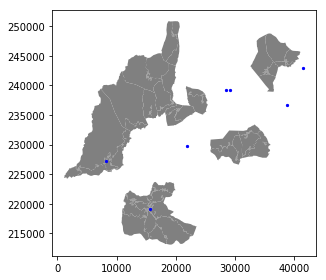

In [75]:
map_dfIV10 = map_df.loc[map_df['IV']==10]

map_dfIV10.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

map_dfIV10.plot(ax=ax, facecolor='gray')

df.plot(ax=ax, color='blue', markersize=5);

plt.tight_layout();

Cabril e Senhora do Pranto

Index = 9

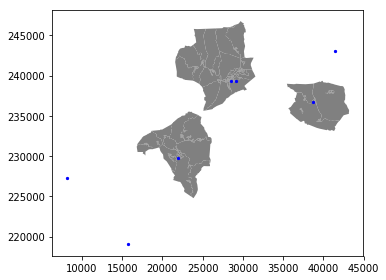

In [76]:
map_dfIV9 = map_df.loc[map_df['IV']==9]

map_dfIV9.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

map_dfIV9.plot(ax=ax, facecolor='gray')

df.plot(ax=ax, color='blue', markersize=5);

plt.tight_layout();

#### Spatial Join

In [77]:
import geopandas
spatialjoin = geopandas.sjoin(map_df, df, how="inner", op='intersects')

In [78]:
spatialjoin

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV,index_right,Name,lat,long,pop,UTM_Easting,UTM_Northing,x_ETRS89,y_ETRS89
42,1706,01,001,25,17060100125,014010,Cabril,"POLYGON ((8362.998800000176 227379.7543000001,...",170601,10,0,Centro Social e Paroquial de Cabril,41.714849,-8.034901,30,580283.49,4618566.98,8172.777,227274.399
107,1706,28,001,07,17062800107,014068,Vilar de Perdizes,"POLYGON ((41506.45540000033 243244.8546999991,...",170628,12,1,Centro Social e Paroquial de Vilar de Perdizes,41.855523,-7.633986,10,613386.77,4634637.30,41446.133,243014.733
641,1706,29,001,28,17062900128,014072,Sarraquinhos,"POLYGON ((38911.11510000005 236814.5138000008,...",170629,9,2,Lar Monte Sereno,41.798622,-7.666606,37,610777.14,4628277.08,38771.743,236679.488
655,1706,15,003,28,17061500328,999999,Residual,"POLYGON ((30125.74060000014 239564.7290000003,...",170615,9,6,Residencial Santa Clara,41.785061,-7.781880,36,601221.45,4626629.28,29180.277,239287.822
931,1706,34,002,16,17063400216,014004,Pisões,"POLYGON ((22626.09970000014 230001.5311999992,...",170634,9,4,Lar dos Pisões para Seniores,41.737331,-7.869785,22,593986.37,4621230.21,21906.038,229800.279
1142,1706,26,003,20,17062600320,014060,Salto,"POLYGON ((15822.08530000038 219291.5892999992,...",170626,10,3,Lar Nossa Senhora do Pranto,41.641292,-7.945080,30,587855.50,4610487.98,15665.477,219117.060
1177,1706,15,003,22,17061500322,013986,Montalegre,"POLYGON ((28418.85049999971 239178.2259, 28406...",170615,9,5,Santa Casa da Misericórdia - Lar,41.822516,-7.790499,80,600446.70,4630777.71,28464.204,239284.931


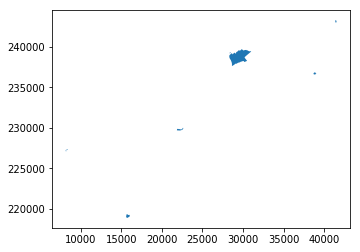

In [79]:
spatialjoin.plot()

## EE Certificates

* Task: Zip code/Address to xy coordinates
* CTT postal codes into MySQL with latitude and longitude from google - https://github.com/cusco/ctt
* CTT postal codes: http://www.ctt.pt/feapl_2/app/restricted/postalCodeSearch/postalCodeDownloadFiles.jspx

### VILARPERDIZES

In [80]:
# import pandas as pd
certificados_VILARPERDIZES = [['SCE0000190104318','F','R DA LABORADA 28', 5470, 461, 'VILAR PERDIZES (S MIGUEL)',  41.857357, -7.630940, 41697.876, 243219.911], 
         ['SCE0000159825838','F', 'R DOS CARRINS 44', 5470, 459, 'VILAR PERDIZES (S MIGUEL)',41.794060, -7.919683, 17739.356, 236089.606],
         ['SCE0000147233929','B', 'R DO VALADO 27',5470, 461, 'VILAR PERDIZES (S MIGUEL)', 41.851364, -7.631392,41664.233,242554.044],
         ['SCE0000146003519','F', 'R DO PENEDO DA LINHAÇA 3', 5470, 461, 'VILAR PERDIZES (S MIGUEL)', 41.849487, -7.632721, 41555.083, 242344.92],
         ['SCE0000130351215','A+','Travessa Primeira da Pedreira 8', 5470, 460, 'VILAR PERDIZES (S MIGUEL)', 41.855853, -7.635156, 41348.766,243050.822],
         ['SCE0000107298027', 'D', 'Rua Poula', 5470, 461, 'VILAR PERDIZES (S MIGUEL)',41.851778, -7.629500,41821.082,242600.947],
         ['SCE000009301842', 'F', 'Travessa do Campo 1', 5470, 461, 'VILAR PERDIZES (S MIGUEL)', 41.852545, -7.705944,35472.515,242651.734],
         ['CENTRO SOCIAL PAROQUIAL DE VILAR DE PERDIZES','NA', 'Rua da Picota 32',5470, 461, 'VILAR PERDIZES (S MIGUEL)', 41.855523,-7.633986, 41446.133,243014.733]]

# Create the pandas DataFrame 
certificados_VILARPERDIZES = pd.DataFrame(certificados_VILARPERDIZES, columns = ['Certificate ID', 'Certificate Grade','Address', '4P', '7P', 'Place', 'lat', 'long', 'x_ETRS89','y_ETRS89']) 

In [81]:
import geopandas as gpd
from shapely.geometry import Point
# combine lat and lon column to a shapely Point() object
certificados_VILARPERDIZES['geometry'] = certificados_VILARPERDIZES.apply(lambda x: Point((float(x.x_ETRS89), float(x.y_ETRS89))), axis=1)

In [82]:
certificados_VILARPERDIZES

,Certificate ID,Certificate Grade,Address,4P,7P,Place,lat,long,x_ETRS89,y_ETRS89,geometry
0,SCE0000190104318,F,R DA LABORADA 28,5470,461,VILAR PERDIZES (S MIGUEL),41.857357,-7.630940,41697.876,243219.911,POINT (41697.876 243219.911)
1,SCE0000159825838,F,R DOS CARRINS 44,5470,459,VILAR PERDIZES (S MIGUEL),41.794060,-7.919683,17739.356,236089.606,POINT (17739.356 236089.606)
2,SCE0000147233929,B,R DO VALADO 27,5470,461,VILAR PERDIZES (S MIGUEL),41.851364,-7.631392,41664.233,242554.044,POINT (41664.233 242554.044)
3,SCE0000146003519,F,R DO PENEDO DA LINHAÇA 3,5470,461,VILAR PERDIZES (S MIGUEL),41.849487,-7.632721,41555.083,242344.920,POINT (41555.083 242344.92)
4,SCE0000130351215,A+,Travessa Primeira da Pedreira 8,5470,460,VILAR PERDIZES (S MIGUEL),41.855853,-7.635156,41348.766,243050.822,POINT (41348.766 243050.822)
5,SCE0000107298027,D,Rua Poula,5470,461,VILAR PERDIZES (S MIGUEL),41.851778,-7.629500,41821.082,242600.947,POINT (41821.082 242600.947)
6,SCE000009301842,F,Travessa do Campo 1,5470,461,VILAR PERDIZES (S MIGUEL),41.852545,-7.705944,35472.515,242651.734,POINT (35472.515 242651.734)
7,CENTRO SOCIAL PAROQUIAL DE VILAR DE PERDIZES,NA,Rua da Picota 32,5470,461,VILAR PERDIZES (S MIGUEL),41.855523,-7.633986,41446.133,243014.733,POINT (41446.133 243014.733)


In [83]:
certificados_VILARPERDIZES = gpd.GeoDataFrame(certificados_VILARPERDIZES, geometry='geometry')

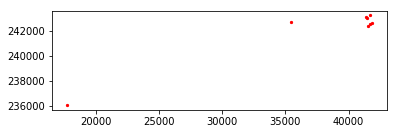

In [84]:
certificados_VILARPERDIZES.plot(color='red', markersize=5)

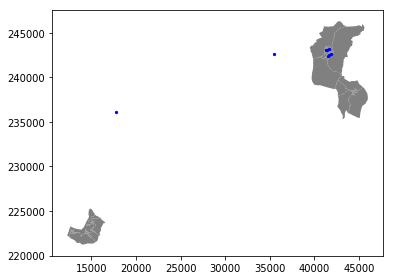

In [85]:
map_dfIV12 = map_df.loc[map_df['IV']==12]

map_dfIV12.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

map_dfIV12.plot(ax=ax, facecolor='gray')

certificados_VILARPERDIZES.plot(ax=ax, color='blue', markersize=5);

plt.tight_layout();


In [86]:
certificados_VILARPERDIZES.crs = {'init':'epsg:3763'}

In [87]:
spatialjoin_certificados_VILARPERDIZES = geopandas.sjoin(map_df, certificados_VILARPERDIZES, how="inner", op='intersects')

In [88]:
spatialjoin_certificados_VILARPERDIZES

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV,...,Certificate ID,Certificate Grade,Address,4P,7P,Place,lat,long,x_ETRS89,y_ETRS89
11,1706,12,001,02,17061200102,014025,Gralhas,"POLYGON ((35544.32969999965 242835.6655000001,...",170612,10,...,SCE000009301842,F,Travessa do Campo 1,5470,461,VILAR PERDIZES (S MIGUEL),41.852545,-7.705944,35472.515,242651.734
107,1706,28,001,07,17062800107,014068,Vilar de Perdizes,"POLYGON ((41506.45540000033 243244.8546999991,...",170628,12,...,CENTRO SOCIAL PAROQUIAL DE VILAR DE PERDIZES,NA,Rua da Picota 32,5470,461,VILAR PERDIZES (S MIGUEL),41.855523,-7.633986,41446.133,243014.733
137,1706,28,002,09,17062800209,014068,Vilar de Perdizes,"POLYGON ((41813.48280000035 242733.5944999997,...",170628,12,...,SCE0000107298027,D,Rua Poula,5470,461,VILAR PERDIZES (S MIGUEL),41.851778,-7.629500,41821.082,242600.947
142,1706,28,002,06,17062800206,014068,Vilar de Perdizes,"POLYGON ((41670.35360000003 242849.3673999999,...",170628,12,...,SCE0000147233929,B,R DO VALADO 27,5470,461,VILAR PERDIZES (S MIGUEL),41.851364,-7.631392,41664.233,242554.044
555,1706,06,001,23,17060600123,014020,Paredes do Rio,"POLYGON ((17737.39589999989 236118.2690999992,...",170606,10,...,SCE0000159825838,F,R DOS CARRINS 44,5470,459,VILAR PERDIZES (S MIGUEL),41.794060,-7.919683,17739.356,236089.606
1189,1706,28,002,17,17062800217,014068,Vilar de Perdizes,"POLYGON ((41678.83430000022 242440.5502000004,...",170628,12,...,SCE0000146003519,F,R DO PENEDO DA LINHAÇA 3,5470,461,VILAR PERDIZES (S MIGUEL),41.849487,-7.632721,41555.083,242344.920
1312,1706,28,001,09,17062800109,014068,Vilar de Perdizes,"POLYGON ((41733.98479999974 243168.0210999995,...",170628,12,...,SCE0000190104318,F,R DA LABORADA 28,5470,461,VILAR PERDIZES (S MIGUEL),41.857357,-7.630940,41697.876,243219.911
1413,1706,28,002,03,17062800203,014068,Vilar de Perdizes,"POLYGON ((41355.9637000002 243031.7284999993, ...",170628,12,...,SCE0000130351215,A+,Travessa Primeira da Pedreira 8,5470,460,VILAR PERDIZES (S MIGUEL),41.855853,-7.635156,41348.766,243050.822


In [89]:
spatialjoin_certificados_VILARPERDIZES['IV']==12

11      False
107      True
137      True
142      True
555     False
1189     True
1312     True
1413     True
Name: IV, dtype: bool

### cabril

In [90]:
certificados_cabril = [['SCE0000162317020','A','RUA DA SOBREIRA DO CHÃO 2', 5470, 17, 'Cabril Mtr',  41.695619, -8.000598,11030.747,225142.393],
                       ['SCE0000157897946','C', 'RUA DA SOBREIRA DO CHÃO 4', 5470, 17, 'Cabril Mtr',  41.695619, -8.000598,11030.747,225142.393],
                       ['SCE0000138540526','C', 'RUA DA SOBREIRA DO CHÃO 3', 5470, 17, 'Cabril Mtr',  41.695619, -8.000598,11030.747,225142.393],
                       ['SCE0000119966032','D', 'Rua Outeiro 2A', 5470, 13, 'Cabril Mtr',41.721552, -8.020193, 9395.795,228020.387],
         ['Centro Social e Paroquial de Cabril','NA','Largo 1º de Maio',5470, 13,'Cabril Mtr', 41.714849, -8.034901, 8172.777, 227274.399]]
        
# Create the pandas DataFrame 
certificados_cabril = pd.DataFrame(certificados_cabril, columns = ['Certificate ID', 'Certificate Grade','Address', '4P', '7P', 'Place', 'lat', 'long', 'x_ETRS89','y_ETRS89']) 

In [91]:
certificados_cabril['geometry'] = certificados_cabril.apply(lambda x: Point((float(x.x_ETRS89), float(x.y_ETRS89))), axis=1)['geometry'] = certificados_cabril.apply(lambda x: Point((float(x.x_ETRS89), float(x.y_ETRS89))), axis=1)

In [92]:
certificados_cabril = gpd.GeoDataFrame(certificados_cabril, geometry='geometry')

In [93]:
certificados_cabril.crs = {'init':'epsg:3763'}

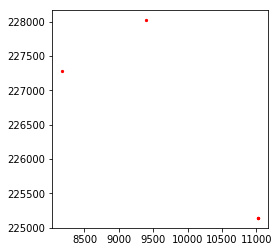

In [94]:
certificados_cabril.plot(color='red', markersize=5)

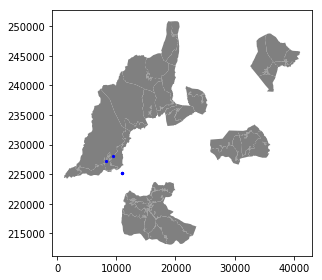

In [95]:
map_dfIV10 = map_df.loc[map_df['IV']==10]

map_dfIV10.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

map_dfIV10.plot(ax=ax, facecolor='gray')

certificados_cabril.plot(ax=ax, color='blue', markersize=5);

plt.tight_layout();

In [96]:
spatialjoin_certificados_cabril = geopandas.sjoin(map_df, certificados_cabril, how="inner", op='intersects')

In [97]:
spatialjoin_certificados_cabril

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV,...,Certificate ID,Certificate Grade,Address,4P,7P,Place,lat,long,x_ETRS89,y_ETRS89
42,1706,01,001,25,17060100125,014010,Cabril,"POLYGON ((8362.998800000176 227379.7543000001,...",170601,10,...,Centro Social e Paroquial de Cabril,NA,Largo 1º de Maio,5470,13,Cabril Mtr,41.714849,-8.034901,8172.777,227274.399
1286,1706,09,001,40,17060900140,013977,Ferral,"POLYGON ((11049.9570000004 225133.8999000005, ...",170609,11,...,SCE0000162317020,A,RUA DA SOBREIRA DO CHÃO 2,5470,17,Cabril Mtr,41.695619,-8.000598,11030.747,225142.393
1286,1706,09,001,40,17060900140,013977,Ferral,"POLYGON ((11049.9570000004 225133.8999000005, ...",170609,11,...,SCE0000157897946,C,RUA DA SOBREIRA DO CHÃO 4,5470,17,Cabril Mtr,41.695619,-8.000598,11030.747,225142.393
1286,1706,09,001,40,17060900140,013977,Ferral,"POLYGON ((11049.9570000004 225133.8999000005, ...",170609,11,...,SCE0000138540526,C,RUA DA SOBREIRA DO CHÃO 3,5470,17,Cabril Mtr,41.695619,-8.000598,11030.747,225142.393
1321,1706,01,001,49,17060100149,999999,Residual,"POLYGON ((11603.42300000042 232689.6685000006,...",170601,10,...,SCE0000119966032,D,Rua Outeiro 2A,5470,13,Cabril Mtr,41.721552,-8.020193,9395.795,228020.387


In [98]:
spatialjoin_certificados_cabril['IV']==10

42       True
1286    False
1286    False
1286    False
1321     True
Name: IV, dtype: bool

### Building Index

Atribuir scoring Edificios (média dos Certificados) e outro temperatura por subseccção (parecido com o que foi feito com indice vulnarabilidade) e depois conjugar os 3 "scores" em que (A x B) x C (temperatura), em que A e B é estático e C dinamico.


#### A – Indice de vulnerabilidade ao nível da freguesia

Att: http://repositorio.insa.pt/bitstream/10400.18/3870/1/ICUR2016_Poster_final.pdf


#### Indicadores 

##### Definição da variável

* DiagIsqCor - % de episódios (ambulatório e internamento), registados nos GDH com pelo menos um
diagnóstico dos códigos 410-414 (CID 9)

* Prop_65mai - % de população residente com 65 ou mais anos,em relação ao total de população residente nos
Censos 2011 (INE)

* Fam_unip % de famílias clássicas com um indivíduo, em relação ao total de famílias clássicas nos Censos
2011 (INE)

* FamUnip65 % de famílias clássicas com um indivíduo com 65 ou mais anos, em relação ao total de famílias
clássicas nos Censos 2011 (INE)

* FamUnipAct % de famílias clássicas com um indivíduo desempregado, reformado ou incapacitado, em
relação ao total de famílias clássicas nos Censos 2011 (INE)

* IndDepIdos - Índice de dependência de idosos (N.º) nos
Censos 2011 (INE)

* TxDesemp -  Taxa de desemprego nos Censos 2011 (INE)

* Ar_cond_Se - % de população residente sem ar condicionado, em relação ao total de população residente nos
Censos 2011 (INE)

* Area_nVer % de área da freguesia não coberta por vegetação ou massas de água no Corine Land Cover 2006 (cod. 31, 321, 22, 23, 212, 213, 141, 4 e 5)


A análise efetuada resultou em três fatores com loadings primários: 

1) características sociodemográficas e falta de Ar Condicionado (AC) (que combina Prop_65mai, Fam_unip,
FamUnip65, FamUnipAct, IndDepIdos e Ar_cond_Se); 

2) taxa de desemprego e área não coberta por vegetação ou massas de água; e 

3) % de episódios motivados por doença isquémica do coração) 

Quadro 2. Estes 3 fatores explicam 72.7 % da variabilidade das 9 variáveis de vulnerabilidade originais (9 a 14) já está feito

O índice cumulativo de vulnerabilidade, obtido da soma dos três fatores para cada freguesia varia entre 7 e 18, com uma média de 10.44 e um desvio padrão de 1.6, seguindo os seus valores para as 4050 freguesias uma distribuição aproximadamente normal (p<0.001).

Base:  Reid, C.E., O’Neill, M.S., Gronlund, C.J., Brines, S.J., Brown, D.G., Diez-Roux, A.V., Schwartz, J. (2009). Mapping Community Determinants of Heat Vulnerability. Environ Health Perspect., 117(11), 1730–1736
https://www.ncbi.nlm.nih.gov/pubmed/20049125

Also check: Development of a heat vulnerability index for New York State: https://www.ncbi.nlm.nih.gov/pubmed/29195682

#### B – Indice de vulnerabilidade dos edifícios ao nível da secção estatística

* A+ : 0.5
* A:  1
* B:  2
* B-: 2.5
* C: 3
* D: 4
* E: 5
* F: 6


Nesta fase, podemos por que para as subsecções onde não há dados, o valor por default é 3

* transform to numerical index

* get mean per BGRI

* expand to all

Ctt postal codes into MySQL with latitude and longitude from google
https://github.com/cusco/ctt

Add population, buildings + eldery

#### C – índice de Temperatura


Para cada dia achar a temperatura maxima e atribuir um índice. Podemos partir o dia em 4 periodos 0-6, 6-12, 12-18, 18-24 (para cada dia já vamos ter uma animação)

0-10:  0
10-15: 0
15-20: 0
20-25: 1
25-30: 2
30-35: 3
35-40: 4

#### D – juntar os índices todos

Nesta fase fazemos que o índice final é A*B*C…se a temperatura where:

Funtion  (<22 = 1, else = 0)


#### Dictionary (numeric, from EE grade to numerical values)

In [99]:
DictionaryEE = {
    'A+': 0.5,
    'A': 1,
    'B':2,
    'B-': 2.5,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'NA':3 #default for NA
}
print (DictionaryEE)

{'A+': 0.5, 'A': 1, 'B': 2, 'B-': 2.5, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'NA': 3}


#### Dictionary as factor

In [100]:
DictionaryEEP = {
    'A+':-2.5,
    'A': -2,
    'B': -1,
    'B-': -0.5,
    'C': 0,
    'D': 1,
    'E': 2,
    'F': 3,
    'NA':0 #default for NA
}
print (DictionaryEEP)

{'A+': -2.5, 'A': -2, 'B': -1, 'B-': -0.5, 'C': 0, 'D': 1, 'E': 2, 'F': 3, 'NA': 0}


##### Mapping Dictionary wiht EE Certificates

VILARPERDIZES

In [101]:
certificados_VILARPERDIZES['EE'] = certificados_VILARPERDIZES['Certificate Grade'].map(DictionaryEEP)

In [102]:
certificados_VILARPERDIZES

,Certificate ID,Certificate Grade,Address,4P,7P,Place,lat,long,x_ETRS89,y_ETRS89,geometry,EE
0,SCE0000190104318,F,R DA LABORADA 28,5470,461,VILAR PERDIZES (S MIGUEL),41.857357,-7.630940,41697.876,243219.911,POINT (41697.876 243219.911),3.0
1,SCE0000159825838,F,R DOS CARRINS 44,5470,459,VILAR PERDIZES (S MIGUEL),41.794060,-7.919683,17739.356,236089.606,POINT (17739.356 236089.606),3.0
2,SCE0000147233929,B,R DO VALADO 27,5470,461,VILAR PERDIZES (S MIGUEL),41.851364,-7.631392,41664.233,242554.044,POINT (41664.233 242554.044),-1.0
3,SCE0000146003519,F,R DO PENEDO DA LINHAÇA 3,5470,461,VILAR PERDIZES (S MIGUEL),41.849487,-7.632721,41555.083,242344.920,POINT (41555.083 242344.92),3.0
4,SCE0000130351215,A+,Travessa Primeira da Pedreira 8,5470,460,VILAR PERDIZES (S MIGUEL),41.855853,-7.635156,41348.766,243050.822,POINT (41348.766 243050.822),-2.5
5,SCE0000107298027,D,Rua Poula,5470,461,VILAR PERDIZES (S MIGUEL),41.851778,-7.629500,41821.082,242600.947,POINT (41821.082 242600.947),1.0
6,SCE000009301842,F,Travessa do Campo 1,5470,461,VILAR PERDIZES (S MIGUEL),41.852545,-7.705944,35472.515,242651.734,POINT (35472.515 242651.734),3.0
7,CENTRO SOCIAL PAROQUIAL DE VILAR DE PERDIZES,NA,Rua da Picota 32,5470,461,VILAR PERDIZES (S MIGUEL),41.855523,-7.633986,41446.133,243014.733,POINT (41446.133 243014.733),0.0


In [103]:
certificados_VILARPERDIZES['EE'].mean(axis=0)

1.1875

Cabril

In [104]:
certificados_cabril['EE'] = certificados_cabril['Certificate Grade'].map(DictionaryEEP)

In [105]:
certificados_cabril

,Certificate ID,Certificate Grade,Address,4P,7P,Place,lat,long,x_ETRS89,y_ETRS89,geometry,EE
0,SCE0000162317020,A,RUA DA SOBREIRA DO CHÃO 2,5470,17,Cabril Mtr,41.695619,-8.000598,11030.747,225142.393,POINT (11030.747 225142.393),-2.0
1,SCE0000157897946,C,RUA DA SOBREIRA DO CHÃO 4,5470,17,Cabril Mtr,41.695619,-8.000598,11030.747,225142.393,POINT (11030.747 225142.393),0.0
2,SCE0000138540526,C,RUA DA SOBREIRA DO CHÃO 3,5470,17,Cabril Mtr,41.695619,-8.000598,11030.747,225142.393,POINT (11030.747 225142.393),0.0
3,SCE0000119966032,D,Rua Outeiro 2A,5470,13,Cabril Mtr,41.721552,-8.020193,9395.795,228020.387,POINT (9395.795 228020.387),1.0
4,Centro Social e Paroquial de Cabril,NA,Largo 1º de Maio,5470,13,Cabril Mtr,41.714849,-8.034901,8172.777,227274.399,POINT (8172.777 227274.399),0.0


In [106]:
certificados_cabril['EE'].mean(axis=0)

-0.2

### Expanding to all

##### 170609 Cabril (-0.2,)
##### 170628 Vilar de Perdiezes (1.1875)
##### 0 as default

In [107]:
DictEE = {
    '170601': 0,
    '170602': 0,
    '170603': 0,
    '170604': 0,
    '170605': 0,
    '170606': 0,
    '170607': 0,
    '170608': 0,
    '170609': -0.2,
    '170610': 0,
    '170611': 0,
    '170612': 0,
    '170613': 0,
    '170614': 0,
    '170615': 0,
    '170616': 0,
    '170617': 0,
    '170618': 0,
    '170619': 0,
    '170620': 0,
    '170621': 0,
    '170622': 0,
    '170623': 0,
    '170624': 0,
    '170625': 0,
    '170626': 0,
    '170627': 0,
    '170628': 1.1875,
    '170629': 0,
    '170630': 0,
    '170631': 0,
    '170632': 0,
    '170633': 0,
    '170634': 0,
    '170635': 0
}
print (DictEE)
#0 as default

{'170601': 0, '170602': 0, '170603': 0, '170604': 0, '170605': 0, '170606': 0, '170607': 0, '170608': 0, '170609': -0.2, '170610': 0, '170611': 0, '170612': 0, '170613': 0, '170614': 0, '170615': 0, '170616': 0, '170617': 0, '170618': 0, '170619': 0, '170620': 0, '170621': 0, '170622': 0, '170623': 0, '170624': 0, '170625': 0, '170626': 0, '170627': 0, '170628': 1.1875, '170629': 0, '170630': 0, '170631': 0, '170632': 0, '170633': 0, '170634': 0, '170635': 0}


In [108]:
map_df["EE"] = map_df['Freguesias'].map(DictEE)

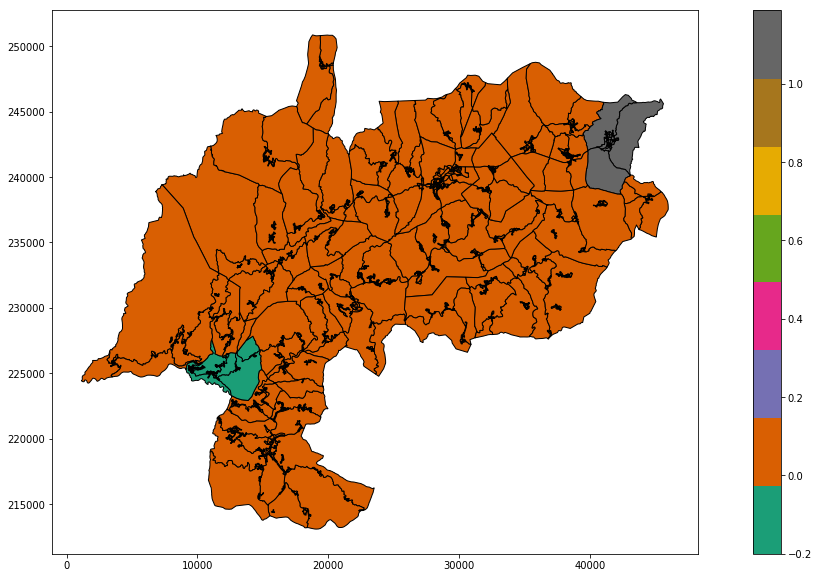

In [109]:
import matplotlib.pyplot as plt
map_df.plot(column='EE', figsize=(20,10), cmap='Dark2', legend=True, edgecolor='black')
plt.show()

Extracting number of buildings and eldery per BGGI

#N_EDIFICIOS_CLASSICOS
#N_IND_RESID_PENS_REFORM

* NIVEL_DSG
- Freguesia
- Subsecção

* NIVEL
- 6 - Freguesia
- 8 - Subsecção

In [110]:
dfa = pd.read_csv("/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#had to change encoding and remove ''', in the CSV 'GEO_COD' 
#dfa2['GEO_COD'] = dfa2['GEO_COD'].str.replace(" ", '')
#N_EDIFICIOS_CLASSICOS
#N_IND_RESID_PENS_REFORM
#dfa.head()
# select rows containing 'NIVEL' 8
new_dataset = dfa
dfa2 =  new_dataset[new_dataset['NIVEL'] == 8]

In [111]:
dfa2['NIVEL'].dtype

dtype('int64')

Using Geo_COD as keys to merges
N_EDIFICIOS_CLASSICOS & N_IND_RESID_PENS_REFORM

In [112]:
dfa3 = dfa2[['GEO_COD','N_EDIFICIOS_CLASSICOS','N_IND_RESID_PENS_REFORM']] 

In [113]:
dfa3['GEO_COD']

83      17060100101
84      17060100102
85      17060100103
86      17060100104
87      17060100105
88      17060100106
89      17060100107
90      17060100108
91      17060100109
92      17060100110
93      17060100111
94      17060100112
95      17060100113
96      17060100114
97      17060100115
98      17060100116
99      17060100117
100     17060100118
101     17060100119
102     17060100120
103     17060100121
104     17060100122
105     17060100123
106     17060100124
107     17060100125
108     17060100126
109     17060100127
110     17060100128
111     17060100129
112     17060100130
           ...     
1470    17063400237
1471    17063400238
1472    17063400239
1473    17063400240
1474    17063400241
1475    17063500101
1476    17063500102
1477    17063500103
1478    17063500104
1479    17063500105
1480    17063500106
1481    17063500107
1482    17063500108
1483    17063500109
1484    17063500110
1485    17063500111
1486    17063500112
1487    17063500113
1488    17063500114


Renaming 'GEO_COD': 'BGRI11' to get same key

In [114]:
dfa3.rename(columns={'GEO_COD': 'BGRI11', 'N_EDIFICIOS_CLASSICOS': 'N_EDIFICIOS_CLASSICOS', 'N_IND_RESID_PENS_REFORM': 'N_IND_RESID_PENS_REFORM'}, inplace=True)
dfa3

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,BGRI11,N_EDIFICIOS_CLASSICOS,N_IND_RESID_PENS_REFORM
83,17060100101,5,1
84,17060100102,15,6
85,17060100103,5,0
86,17060100104,10,3
87,17060100105,8,5
88,17060100106,3,3
89,17060100107,8,4
90,17060100108,2,0
91,17060100109,3,0
92,17060100110,5,4


Merging 2 dataframes on 'BGRI11'

In [115]:
result = pd.merge(map_df,
                 dfa3,
                 on='BGRI11',
                 how='left')

In [116]:
result

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV,EE,N_EDIFICIOS_CLASSICOS,N_IND_RESID_PENS_REFORM
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,...",170634,9,0.0000,2,0
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,...",170625,14,0.0000,27,7
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,...",170626,10,0.0000,0,0
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,...",170612,10,0.0000,0,0
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,...",170608,9,0.0000,5,1
5,1706,08,001,04,17060800104,013976,Donões,"POLYGON ((26133.63350000046 240653.2193, 26158...",170608,9,0.0000,11,3
6,1706,26,001,29,17062600129,014050,Borralha,"POLYGON ((13150.00980000012 220814.8302999996,...",170626,10,0.0000,30,22
7,1706,09,001,13,17060900113,013983,Viveiro,"POLYGON ((11692.52350000013 225573.6453000009,...",170609,11,-0.2000,4,4
8,1706,26,001,28,17062600128,014050,Borralha,"POLYGON ((12941.24390000012 220932.5219999999,...",170626,10,0.0000,15,9
9,1706,26,001,31,17062600131,014050,Borralha,"POLYGON ((12881.59680000041 220843.2776999995,...",170626,10,0.0000,24,18


##  Area (in square kilometers)

In [117]:
map_df= map_df.to_crs({'init':'epsg:3763'})
map_df["Area"] = map_df['geometry'].area/ 10**6
map_df["Area"]

0       9.675835
1       0.039545
2       4.676213
3       0.172264
4       0.022383
5       0.019524
6       0.029426
7       0.019139
8       0.032737
9       0.015415
10      0.022651
11      0.054155
12      1.967808
13      0.030532
14      0.058534
15      0.039294
16      0.023604
17      0.025729
18      0.011506
19      2.347494
20      0.002856
21      0.134595
22      0.051602
23      0.108431
24      0.017852
25      0.039116
26      0.013683
27      0.011374
28      0.065379
29      0.003590
          ...   
1387    0.005844
1388    0.002270
1389    0.004916
1390    0.001417
1391    0.018495
1392    0.006657
1393    0.006771
1394    0.023118
1395    0.005595
1396    0.000589
1397    0.023688
1398    0.000797
1399    9.280206
1400    0.089863
1401    0.002466
1402    0.038897
1403    0.007208
1404    0.017981
1405    0.182409
1406    0.019263
1407    0.013812
1408    0.032822
1409    1.505935
1410    0.317162
1411    0.020027
1412    5.890420
1413    0.011287
1414    0.0185

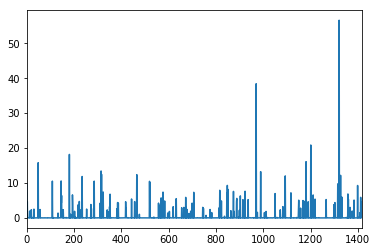

In [118]:
map_df["Area"].plot()

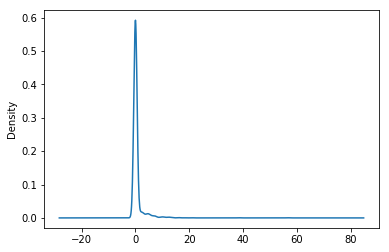

In [119]:
map_df["Area"].plot.kde()

##### N_EDIFICIOS_CLASSICOS

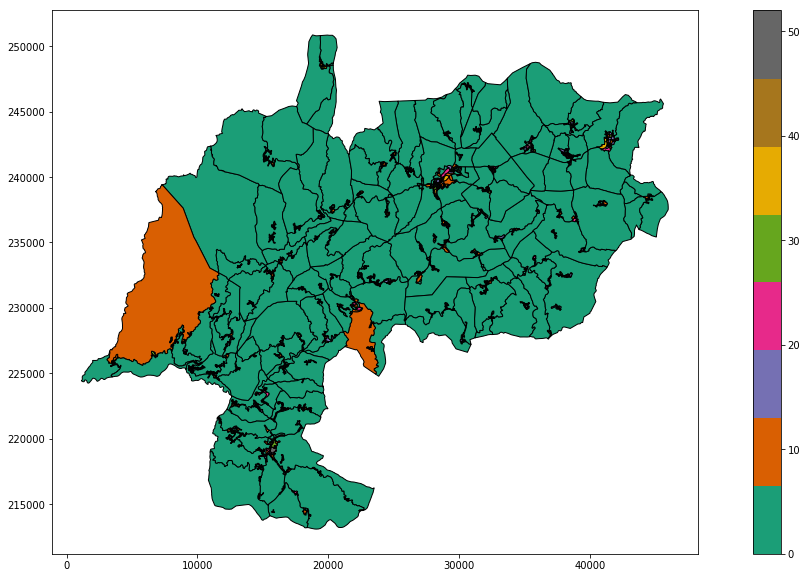

In [120]:
import matplotlib.pyplot as plt
result.plot(column='N_EDIFICIOS_CLASSICOS', figsize=(20,10), cmap='Dark2', legend=True, edgecolor='black')
plt.show()

##### N_IND_RESID_PENS_REFORM

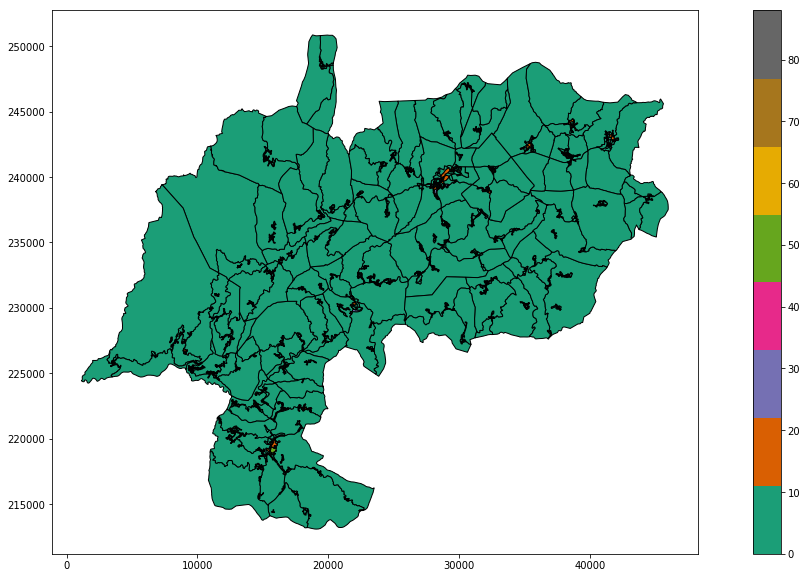

In [121]:
import matplotlib.pyplot as plt
result.plot(column='N_IND_RESID_PENS_REFORM', figsize=(20,10), cmap='Dark2', legend=True, edgecolor='black')
plt.show()

#### Temperature

As any period of at least three consecutive days for which two conditions are satisfied. First, the daily maximum temperature exceeds the 80th percentile maximum for that station and month. Second, on at least two of those three days the daily minimum temperature also falls within the highest 20% of minimum temperatures. A heat wave is similarly defined using the 90th percentile temperatures. 
[see Parker et al., 2013, 2014].

In [122]:
import os
filepath='/Users/dvf/Desktop/reliable_getMeteo' 
os.chdir(filepath)
%run reliable_getMeteo_config.py

In [123]:
import pandas as pd
weather = pd.read_json("/Users/dvf/Desktop/reliable_getMeteo/meteo_20190712.json")

In [124]:
weather.dtypes

Cabril           object
VilarPerdizes    object
dtype: object

In [125]:
weather

,Cabril,VilarPerdizes
2019-07-12 00:00:00,"{'t2': 19.05, 'hr': 62.03, 'pp': 0.0, 'cl': 0....","{'t2': 18.24, 'hr': 67.73, 'pp': 0.0, 'cl': 0...."
2019-07-12 01:00:00,"{'t2': 18.33, 'hr': 81.99, 'pp': 0.0, 'cl': 0....","{'t2': 17.62, 'hr': 84.11, 'pp': 0.0, 'cl': 0...."
2019-07-12 02:00:00,"{'t2': 18.53, 'hr': 78.62, 'pp': 0.0, 'cl': 0....","{'t2': 17.63, 'hr': 81.95, 'pp': 0.0, 'cl': 0...."
2019-07-12 03:00:00,"{'t2': 18.45, 'hr': 77.5, 'pp': 0.0, 'cl': 0.0...","{'t2': 17.57, 'hr': 80.7, 'pp': 0.0, 'cl': 0.0..."
2019-07-12 04:00:00,"{'t2': 18.25, 'hr': 77.17, 'pp': 0.0, 'cl': 0....","{'t2': 17.47, 'hr': 80.09, 'pp': 0.0, 'cl': 0...."
2019-07-12 05:00:00,"{'t2': 18.04, 'hr': 77.71, 'pp': 0.0, 'cl': 0....","{'t2': 17.09, 'hr': 81.59, 'pp': 0.0, 'cl': 0...."
2019-07-12 06:00:00,"{'t2': 19.07, 'hr': 71.76, 'pp': 0.0, 'cl': 0....","{'t2': 17.59, 'hr': 83.5, 'pp': 0.0, 'cl': 0.0..."
2019-07-12 07:00:00,"{'t2': 21.5, 'hr': 65.88, 'pp': 0.0, 'cl': 0.0...","{'t2': 20.93, 'hr': 68.39, 'pp': 0.0, 'cl': 0...."
2019-07-12 08:00:00,"{'t2': 23.91, 'hr': 60.04, 'pp': 0.0, 'cl': 0....","{'t2': 22.8, 'hr': 60.61, 'pp': 0.0, 'cl': 0.0..."
2019-07-12 09:00:00,"{'t2': 26.14, 'hr': 51.93, 'pp': 0.0, 'cl': 0....","{'t2': 25.1, 'hr': 53.85, 'pp': 0.0, 'cl': 0.0..."


Cabril

In [126]:
Temp_Cabril = weather['Cabril']

In [127]:
Temp_Perdizes = weather['VilarPerdizes']

In [128]:
Temp_Cabril = Temp_Cabril.apply(pd.Series)
Temp_Cabril

,t2,hr,pp,cl,ws,wd
2019-07-12 00:00:00,19.05,62.03,0.00,0.00,1.64,47.76
2019-07-12 01:00:00,18.33,81.99,0.00,0.00,2.30,53.09
2019-07-12 02:00:00,18.53,78.62,0.00,0.00,1.95,58.98
2019-07-12 03:00:00,18.45,77.50,0.00,0.00,1.77,72.09
2019-07-12 04:00:00,18.25,77.17,0.00,0.00,1.87,91.94
2019-07-12 05:00:00,18.04,77.71,0.00,0.00,2.57,98.97
2019-07-12 06:00:00,19.07,71.76,0.00,0.00,3.63,98.40
2019-07-12 07:00:00,21.50,65.88,0.00,0.00,4.07,102.18
2019-07-12 08:00:00,23.91,60.04,0.00,0.00,3.84,114.56
2019-07-12 09:00:00,26.14,51.93,0.00,0.00,3.02,130.73


In [129]:
Temp_Max = Temp_Cabril['t2'].loc[Temp_Cabril.groupby(pd.Grouper(freq='D')).idxmax().iloc[:, 0]]

In [130]:
Temp_Max

2019-07-12 15:00:00    31.36
2019-07-13 11:00:00    27.75
2019-07-14 14:00:00    24.26
2019-07-15 14:00:00    25.39
2019-07-16 14:00:00    25.92
2019-07-17 14:00:00    22.76
2019-07-18 15:00:00    26.25
Name: t2, dtype: float64

In [131]:
Temp_Perdizes = Temp_Perdizes.apply(pd.Series)
Temp_Perdizes

,t2,hr,pp,cl,ws,wd
2019-07-12 00:00:00,18.24,67.73,0.00,0.00,1.03,328.26
2019-07-12 01:00:00,17.62,84.11,0.00,0.00,2.23,324.48
2019-07-12 02:00:00,17.63,81.95,0.00,0.00,2.14,328.35
2019-07-12 03:00:00,17.57,80.70,0.00,0.00,1.65,325.99
2019-07-12 04:00:00,17.47,80.09,0.00,0.00,0.35,320.99
2019-07-12 05:00:00,17.09,81.59,0.00,0.00,0.89,155.99
2019-07-12 06:00:00,17.59,83.50,0.00,0.00,1.20,168.12
2019-07-12 07:00:00,20.93,68.39,0.00,0.00,1.91,170.24
2019-07-12 08:00:00,22.80,60.61,0.00,0.00,2.81,155.22
2019-07-12 09:00:00,25.10,53.85,0.00,0.00,2.70,153.89


In [132]:
Temp_MaxPerdizes = Temp_Perdizes['t2'].loc[Temp_Perdizes.groupby(pd.Grouper(freq='D')).idxmax().iloc[:, 0]]

In [133]:
Temp_MaxPerdizes

2019-07-12 15:00:00    33.68
2019-07-13 12:00:00    28.85
2019-07-14 15:00:00    26.75
2019-07-15 14:00:00    27.65
2019-07-16 13:00:00    25.30
2019-07-17 13:00:00    22.88
2019-07-18 16:00:00    26.58
Name: t2, dtype: float64

In [134]:
Temp_Max.diff() > 0

2019-07-12 15:00:00    False
2019-07-13 11:00:00    False
2019-07-14 14:00:00    False
2019-07-15 14:00:00     True
2019-07-16 14:00:00     True
2019-07-17 14:00:00    False
2019-07-18 15:00:00     True
Name: t2, dtype: bool

In [135]:
(Temp_Max.diff() > 0).sum()

3

Size of the Changes

In [136]:
Temp_Max.diff()

2019-07-12 15:00:00     NaN
2019-07-13 11:00:00   -3.61
2019-07-14 14:00:00   -3.49
2019-07-15 14:00:00    1.13
2019-07-16 14:00:00    0.53
2019-07-17 14:00:00   -3.16
2019-07-18 15:00:00    3.49
Name: t2, dtype: float64

In [137]:
Temp_Cabril[Temp_Cabril['t2'].gt(32)].index #getting temperature above 32

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [138]:
len([1 for i in Temp_Cabril['t2'] if i > 32])

0

In [139]:
Temp_Cabril['t2'].rolling(2, min_periods=1).max()

2019-07-12 00:00:00    19.05
2019-07-12 01:00:00    19.05
2019-07-12 02:00:00    18.53
2019-07-12 03:00:00    18.53
2019-07-12 04:00:00    18.45
2019-07-12 05:00:00    18.25
2019-07-12 06:00:00    19.07
2019-07-12 07:00:00    21.50
2019-07-12 08:00:00    23.91
2019-07-12 09:00:00    26.14
2019-07-12 10:00:00    28.39
2019-07-12 11:00:00    29.72
2019-07-12 12:00:00    30.48
2019-07-12 13:00:00    30.90
2019-07-12 14:00:00    31.33
2019-07-12 15:00:00    31.36
2019-07-12 16:00:00    31.36
2019-07-12 17:00:00    29.88
2019-07-12 18:00:00    29.31
2019-07-12 19:00:00    28.41
2019-07-12 20:00:00    25.11
2019-07-12 21:00:00    22.54
2019-07-12 22:00:00    21.93
2019-07-12 23:00:00    21.66
2019-07-13 00:00:00    21.43
2019-07-13 01:00:00    20.88
2019-07-13 02:00:00    20.14
2019-07-13 03:00:00    20.37
2019-07-13 04:00:00    21.18
2019-07-13 05:00:00    21.18
                       ...  
2019-07-17 18:00:00    20.79
2019-07-17 19:00:00    19.44
2019-07-17 20:00:00    17.64
2019-07-17 21:

In [140]:
Temp_Cabril['t2'].resample("6h").max().fillna(0).rolling(window=3, min_periods=1).max()

2019-07-12 00:00:00    19.05
2019-07-12 06:00:00    29.72
2019-07-12 12:00:00    31.36
2019-07-12 18:00:00    31.36
2019-07-13 00:00:00    31.36
2019-07-13 06:00:00    28.41
2019-07-13 12:00:00    27.75
2019-07-13 18:00:00    27.75
2019-07-14 00:00:00    27.33
2019-07-14 06:00:00    24.24
2019-07-14 12:00:00    24.26
2019-07-14 18:00:00    24.26
2019-07-15 00:00:00    24.26
2019-07-15 06:00:00    24.21
2019-07-15 12:00:00    25.39
2019-07-15 18:00:00    25.39
2019-07-16 00:00:00    25.39
2019-07-16 06:00:00    24.33
2019-07-16 12:00:00    25.92
2019-07-16 18:00:00    25.92
2019-07-17 00:00:00    25.92
2019-07-17 06:00:00    22.02
2019-07-17 12:00:00    22.76
2019-07-17 18:00:00    22.76
2019-07-18 00:00:00    22.76
2019-07-18 06:00:00    21.77
2019-07-18 12:00:00    26.25
2019-07-18 18:00:00    26.25
Freq: 6H, Name: t2, dtype: float64

New collum with Temperapure

In [141]:
Temp = max(Temp_Cabril['t2'])

Setting 0 and 1 values if a temperature will be above certain threshold

In [142]:
b = [1 if x > 32 else 0 for x in (Temp_Max)] #using 32, return list

Creat list with results, per day 

In [143]:
keys = ['0','1','2','3','4','5','6']
values = b
dictionary = dict(zip(keys, values))
print(dictionary)

{'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0}


In [155]:
print(b[1])

0


then dictionary with those values

In [156]:
# List of keys 
listKeys = ['170601','170602','170603','170604','170605','170606','170607','170608','170609','170610','170611','170612','170613','170614','170615','170616','170617','170618','170619','170620','170621','170622','170623','170624','170625','170626','170627','170628','170629', '170630','170631','170632','170633','170634','170635']
# using zip() function to create a dictionary 
# with keys and same length None value  
dct = dict(zip(listKeys, [0]*len(listKeys))) 
# print dict 
print(dct) 

{'170601': 0, '170602': 0, '170603': 0, '170604': 0, '170605': 0, '170606': 0, '170607': 0, '170608': 0, '170609': 0, '170610': 0, '170611': 0, '170612': 0, '170613': 0, '170614': 0, '170615': 0, '170616': 0, '170617': 0, '170618': 0, '170619': 0, '170620': 0, '170621': 0, '170622': 0, '170623': 0, '170624': 0, '170625': 0, '170626': 0, '170627': 0, '170628': 0, '170629': 0, '170630': 0, '170631': 0, '170632': 0, '170633': 0, '170634': 0, '170635': 0}


Replace with know values (BGRI)

In [157]:
dct['170609']  =  b[5] #170609 Cabril 

In [158]:
Temp_Perdizes = Temp_Perdizes.apply(pd.Series)

In [159]:
Temp_MaxPerdizes = Temp_Perdizes['t2'].loc[Temp_Perdizes.groupby(pd.Grouper(freq='D')).idxmax().iloc[:, 0]]

In [160]:
c = [1 if x > 32 else 0 for x in (Temp_MaxPerdizes)] #using 22, return list

In [161]:
keys = ['0','1','2','3','4','5','6']
valuesP = c
dictionary = dict(zip(keys, valuesP))
print(dictionary)

{'0': 1, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0}


In [162]:
dct['170628'] = c[0] #170628 Vilar de Perdizes 

In [163]:
dct

{'170601': 0,
 '170602': 0,
 '170603': 0,
 '170604': 0,
 '170605': 0,
 '170606': 0,
 '170607': 0,
 '170608': 0,
 '170609': 0,
 '170610': 0,
 '170611': 0,
 '170612': 0,
 '170613': 0,
 '170614': 0,
 '170615': 0,
 '170616': 0,
 '170617': 0,
 '170618': 0,
 '170619': 0,
 '170620': 0,
 '170621': 0,
 '170622': 0,
 '170623': 0,
 '170624': 0,
 '170625': 0,
 '170626': 0,
 '170627': 0,
 '170628': 1,
 '170629': 0,
 '170630': 0,
 '170631': 0,
 '170632': 0,
 '170633': 0,
 '170634': 0,
 '170635': 0}

In [164]:
map_df["TEMP"] = map_df['Freguesias'].map(dct)

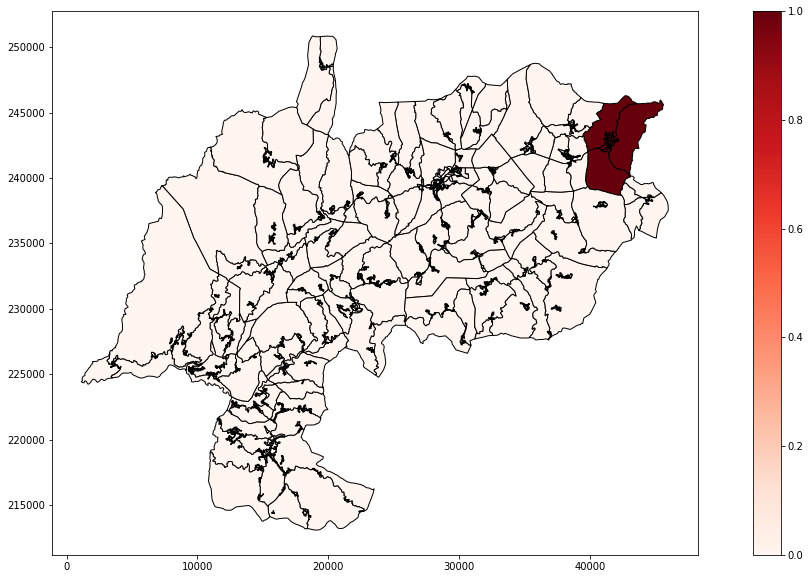

In [165]:
import matplotlib.pyplot as plt
map_df.plot(column='TEMP', figsize=(20,10), cmap='Reds', legend=True, edgecolor='black')
plt.show()

### Overall_Score


In [166]:
map_df["Overall_Score"] = (map_df["IV"] + map_df["EE"]) * map_df["TEMP"]

In [167]:
map_df['percentage'] = map_df["EE"]/map_df["EE"].mean()


In [168]:
#map_df["Overall_Score"] = (map_df["IV"] * map_df["percentage"]) * map_df["TEMP"]

In [169]:
map_df["Overall_Score"]

0        0.0000
1        0.0000
2        0.0000
3        0.0000
4        0.0000
5        0.0000
6        0.0000
7        0.0000
8        0.0000
9        0.0000
10       0.0000
11       0.0000
12       0.0000
13       0.0000
14       0.0000
15       0.0000
16       0.0000
17       0.0000
18       0.0000
19       0.0000
20       0.0000
21       0.0000
22       0.0000
23       0.0000
24       0.0000
25       0.0000
26       0.0000
27       0.0000
28       0.0000
29       0.0000
         ...   
1387     0.0000
1388     0.0000
1389     0.0000
1390     0.0000
1391     0.0000
1392     0.0000
1393     0.0000
1394     0.0000
1395     0.0000
1396     0.0000
1397     0.0000
1398     0.0000
1399     0.0000
1400     0.0000
1401     0.0000
1402     0.0000
1403     0.0000
1404     0.0000
1405     0.0000
1406     0.0000
1407     0.0000
1408     0.0000
1409     0.0000
1410     0.0000
1411     0.0000
1412     0.0000
1413    13.1875
1414    13.1875
1415    13.1875
1416     0.0000
Name: Overall_Score, Len

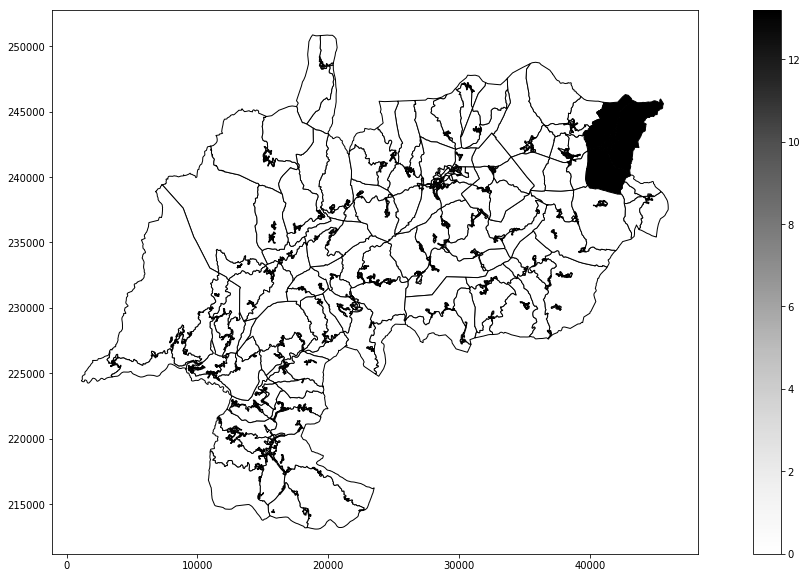

In [170]:
import matplotlib.pyplot as plt
map_df.plot(column='Overall_Score', figsize=(20,10), cmap='Greys', legend=True, edgecolor='black')
plt.show()